In [ ]:
# load data
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/afifai/pelatihan_machinelearning/master/data/train.csv", index_col=0)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=46)

In [ ]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler


num_col = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
cat_col = ['Sex']

num_pipeline = make_pipeline(SimpleImputer(strategy='median'),
                             StandardScaler())

cat_pipeline = make_pipeline(OneHotEncoder())

data_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num_col),
    ('pipe_cat', cat_pipeline, cat_col)
])

In [ ]:
# ekstrak fitur menggunakan pipeline

X_train = data_pipeline.fit_transform(X_train)
X_test = data_pipeline.fit_transform(X_test)

In [ ]:
X_train.shape

(712, 7)

### Build Model

In [ ]:
# sequential API
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense #fully connected layers

# deklarasi model
model = Sequential()
model.add(Dense(5, activation='relu', input_shape=(7,))) #hidden layer 4 neuron
model.add(Dense(4, activation='relu')) #hidden layer
model.add(Dense(3, activation='relu')) #hidden layer
model.add(Dense(1, activation='sigmoid'))

# compile
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#Train
history = model.fit(X_train, y_train, epochs=300, validation_data=(X_test, y_test))

Epoch 1/300
23/23 [==============================] - 1s 14ms/step - loss: 0.7778 - accuracy: 0.4073 - val_loss: 0.7276 - val_accuracy: 0.4246
Epoch 2/300
23/23 [==============================] - 0s 6ms/step - loss: 0.7212 - accuracy: 0.4171 - val_loss: 0.6965 - val_accuracy: 0.4302
Epoch 3/300
23/23 [==============================] - 0s 6ms/step - loss: 0.6962 - accuracy: 0.4508 - val_loss: 0.6827 - val_accuracy: 0.4413
Epoch 4/300
23/23 [==============================] - 0s 6ms/step - loss: 0.6812 - accuracy: 0.4775 - val_loss: 0.6706 - val_accuracy: 0.4525
Epoch 5/300
23/23 [==============================] - 0s 6ms/step - loss: 0.6703 - accuracy: 0.5323 - val_loss: 0.6590 - val_accuracy: 0.6536
Epoch 6/300
23/23 [==============================] - 0s 7ms/step - loss: 0.6602 - accuracy: 0.7163 - val_loss: 0.6488 - val_accuracy: 0.7486
Epoch 7/300
23/23 [==============================] - 0s 6ms/step - loss: 0.6508 - accuracy: 0.7416 - val_loss: 0.6389 - val_accuracy: 0.7430
Epoch 8/300


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


metrics = pd.DataFrame(history.history)

In [ ]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.777781,0.407303,0.727635,0.424581
1,0.721169,0.417135,0.696497,0.430168
2,0.696151,0.450843,0.682726,0.441341
3,0.681215,0.477528,0.670621,0.452514
4,0.670270,0.532303,0.659034,0.653631


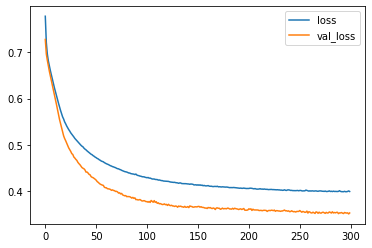

In [ ]:
metrics[['loss', 'val_loss']].plot()

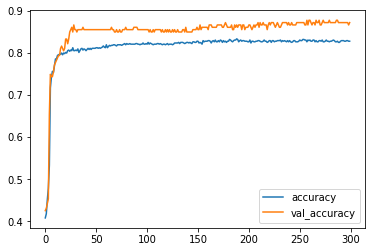

In [ ]:
metrics[['accuracy', 'val_accuracy']].plot()

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 5)                 40        
                                                                 
 dense_7 (Dense)             (None, 4)                 24        
                                                                 
 dense_8 (Dense)             (None, 3)                 15        
                                                                 
 dense_9 (Dense)             (None, 1)                 4         
                                                                 
Total params: 83
Trainable params: 83
Non-trainable params: 0
_________________________________________________________________


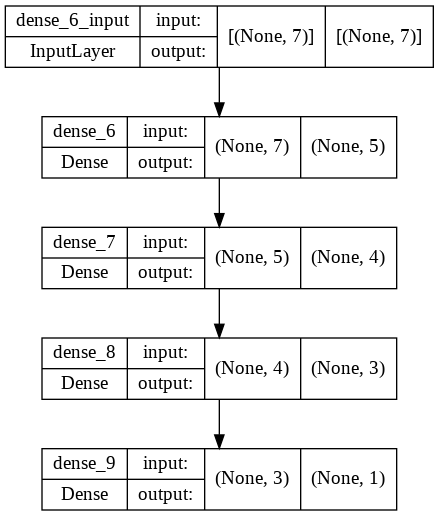

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

hidden_1()

hidden_2()

output()

h1 = hidden_1(data)

h2 = hidden_2(h1)

res = output(h2)

In [ ]:
# fuctional API
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# fungsi layer
data_in = Input(shape=(7,))
hidden_1 = Dense(4, activation='relu')(data_in)
out = Dense(1, activation='sigmoid')(hidden_1)

#jadikan satu
model = Model(inputs=data_in, outputs=out)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 7)]               0         
                                                                 
 dense_10 (Dense)            (None, 4)                 32        
                                                                 
 dense_11 (Dense)            (None, 1)                 5         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compile
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#Train
history = model.fit(X_train, y_train, epochs=300, validation_data=(X_test, y_test))

Epoch 1/300
23/23 [==============================] - 1s 15ms/step - loss: 0.7357 - accuracy: 0.6138 - val_loss: 0.7165 - val_accuracy: 0.6480
Epoch 2/300
23/23 [==============================] - 0s 6ms/step - loss: 0.7198 - accuracy: 0.6320 - val_loss: 0.7029 - val_accuracy: 0.6648
Epoch 3/300
23/23 [==============================] - 0s 6ms/step - loss: 0.7055 - accuracy: 0.6461 - val_loss: 0.6908 - val_accuracy: 0.6704
Epoch 4/300
23/23 [==============================] - 0s 6ms/step - loss: 0.6913 - accuracy: 0.6615 - val_loss: 0.6789 - val_accuracy: 0.6927
Epoch 5/300
23/23 [==============================] - 0s 6ms/step - loss: 0.6774 - accuracy: 0.6713 - val_loss: 0.6679 - val_accuracy: 0.7151
Epoch 6/300
23/23 [==============================] - 0s 6ms/step - loss: 0.6642 - accuracy: 0.6812 - val_loss: 0.6560 - val_accuracy: 0.7207
Epoch 7/300
23/23 [==============================] - 0s 6ms/step - loss: 0.6505 - accuracy: 0.6882 - val_loss: 0.6437 - val_accuracy: 0.7095
Epoch 8/300


In [ ]:
# inference
import numpy as np
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
y_pred = np.where(y_pred > 0.5, 1, 0) #thereshold yg berbeda menghasilkan akurasi yg berbeda
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       104
           1       0.87      0.72      0.79        75

    accuracy                           0.84       179
   macro avg       0.85      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179



### MNIST CLASSIFICASITION

In [ ]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
import matplotlib.pyplot as plt

def show_im(image):
  plt.imshow(image, cmap='binary')

5

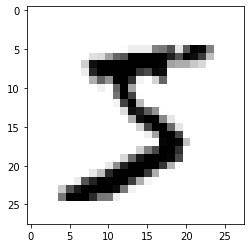

In [ ]:
show_im(X_train[0])
y_train[0]

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
from sklearn.model_selection import train_test_split

#split data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=46)

In [ ]:
#siapkan label menggunak OHE
from tensorflow.keras.utils import to_categorical
y_train_ohe = to_categorical(y_train)
y_val_ohe = to_categorical(y_val)
y_test_ohe = to_categorical(y_test)

In [ ]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(256, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 256)               200960    
                                                                 
 dense_15 (Dense)            (None, 32)                8224      
                                                                 
 dense_16 (Dense)            (None, 10)                330       
                                                                 
Total params: 209,514
Trainable params: 209,514
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compile
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#Train
history = model.fit(X_train, y_train_ohe, epochs=50, batch_size=128, validation_data=(X_val, y_val_ohe))

Epoch 1/50
422/422 [==============================] - 3s 5ms/step - loss: 0.0927 - accuracy: 0.8551 - val_loss: 0.0384 - val_accuracy: 0.9478
Epoch 2/50
422/422 [==============================] - 2s 4ms/step - loss: 0.0320 - accuracy: 0.9544 - val_loss: 0.0246 - val_accuracy: 0.9665
Epoch 3/50
422/422 [==============================] - 2s 4ms/step - loss: 0.0221 - accuracy: 0.9694 - val_loss: 0.0197 - val_accuracy: 0.9730
Epoch 4/50
422/422 [==============================] - 2s 4ms/step - loss: 0.0170 - accuracy: 0.9767 - val_loss: 0.0171 - val_accuracy: 0.9760
Epoch 5/50
422/422 [==============================] - 2s 4ms/step - loss: 0.0135 - accuracy: 0.9818 - val_loss: 0.0156 - val_accuracy: 0.9800
Epoch 6/50
422/422 [==============================] - 2s 4ms/step - loss: 0.0109 - accuracy: 0.9856 - val_loss: 0.0143 - val_accuracy: 0.9795
Epoch 7/50
422/422 [==============================] - 2s 4ms/step - loss: 0.0089 - accuracy: 0.9891 - val_loss: 0.0138 - val_accuracy: 0.9815
Epoch 

In [ ]:
metrics = pd.DataFrame(history.history)

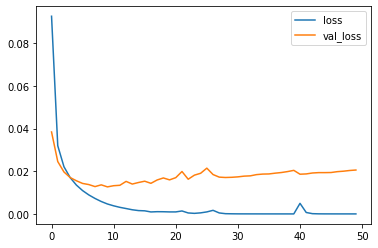

In [ ]:
metrics[['loss', 'val_loss']].plot()

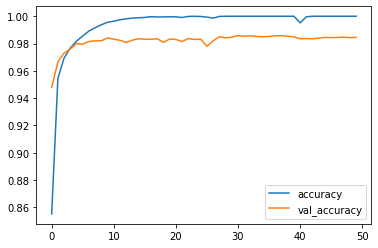

In [ ]:
metrics[['accuracy', 'val_accuracy']].plot()

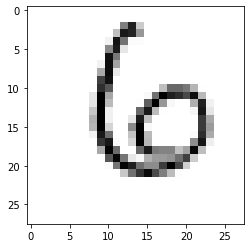

In [ ]:
new_data = X_test[100]
show_im(new_data)

In [ ]:
new_data.shape

(28, 28)

In [ ]:
pred = model.predict(new_data.reshape(1,28,28))
pred.argmax()

6

In [ ]:
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=1)

In [ ]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.98      0.99      0.99      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

